In [4]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import numpy as np
# Set random seed for reproducibility
np.random.seed(1)
# Set initial values
num_points = 200
x = np.zeros(num_points)
lam = np.zeros(num_points)
nu = 0.3
omega = 1.5
lam[0] = nu
x[0] = np.random.poisson(lam[0])
# Generate values for x and update lambda
for t in range(1, num_points):
    lam[t] = nu*(omega**x[t-1])
    x[t] = np.random.poisson(lam[t])

def plot_x():
    """Helper function if you want to visualize x"""
    import matplotlib.pyplot as plt
    plt.stem(x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()

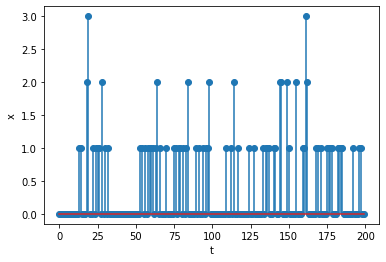

In [3]:
plot_x()

In [15]:
y = cp.Variable()
z = cp.Variable()

sum = -cp.exp(y) + x[0] * y
for i in np.arange(1, num_points):
  sum += -cp.exp(y + x[i-1] * z) + x[i] * y + x[i] * x[i-1] * z

problem = cp.Problem(cp.Maximize(sum))
problem.solve()

print(f"nu_est={np.exp(y.value)}, omega_est = {np.exp(z.value)}")

nu_est=0.3634133596293463, omega_est = 1.3701507265444453
